### Simple model for DAIC-WOZ

- Dont use cuda True, the training is way more slower

In [1]:
import pandas as pd
#dev
import importlib as imp
import functions
from functions import *

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



In [2]:
BASE_PATH = "datasets/DAIC-WOZ/"
files = os.listdir(BASE_PATH+"/cuts")

In [3]:
df_train = pd.read_csv(BASE_PATH + "train_split_Depression_AVEC2017.csv")
df_dev = pd.read_csv(BASE_PATH + "dev_split_Depression_AVEC2017.csv")
df_dev = df_dev[['Participant_ID', 'PHQ8_Binary', 'PHQ8_Score']]
df_train = df_train[['Participant_ID', 'PHQ8_Binary', 'PHQ8_Score']]

In [4]:
len(set(df_train["Participant_ID"]))

107

### Step by step model building - BASE

In [5]:
imp.reload(functions)
from functions import *
sentiments=['negative', 'neutral', 'positive']

BASE_PATH
X_train, y_train = process_audio_files(BASE_PATH+"cuts", df_train, sentiments, method="complex", classification="binary", dataset="DAIC", debug_mode=True)   

Processing inputs: base_path=datasets/DAIC-WOZ/cuts, sentiments=['negative', 'neutral', 'positive'], method=complex, classification=binary
Processing file: datasets/DAIC-WOZ/cuts/303_segment_0.wav
Processing file: datasets/DAIC-WOZ/cuts/303_segment_1.wav
Processing file: datasets/DAIC-WOZ/cuts/303_segment_10.wav
Processing file: datasets/DAIC-WOZ/cuts/303_segment_11.wav
Processing file: datasets/DAIC-WOZ/cuts/303_segment_12.wav
Processing file: datasets/DAIC-WOZ/cuts/303_segment_13.wav
Processing file: datasets/DAIC-WOZ/cuts/303_segment_14.wav
Processing file: datasets/DAIC-WOZ/cuts/303_segment_15.wav
Processing file: datasets/DAIC-WOZ/cuts/303_segment_16.wav
Processing file: datasets/DAIC-WOZ/cuts/303_segment_17.wav
Processing file: datasets/DAIC-WOZ/cuts/303_segment_18.wav
Processing file: datasets/DAIC-WOZ/cuts/303_segment_19.wav
Processing file: datasets/DAIC-WOZ/cuts/303_segment_2.wav
Processing file: datasets/DAIC-WOZ/cuts/303_segment_20.wav
Processing file: datasets/DAIC-WOZ/cut

UnboundLocalError: cannot access local variable 'audio_type' where it is not associated with a value

In [6]:
imp.reload(functions)
from functions import *

# Example paths
feature_path = BASE_PATH+"train_best.npy"
label_path = BASE_PATH+'train_label_best.csv'

# Call save_data to save the features and labels
save_audio_features_data(X_train, y_train, feature_path, label_path)

NameError: name 'X_train' is not defined

In [ ]:
imp.reload(functions)
from functions import *

X_test, y_test = process_audio_files(BASE_PATH+"cuts", 
                                     df_dev, 
                                     sentiments, 
                                     method="complex", 
                                     classification="binary", 
                                     dataset="DAIC",
                                     debug_mode=True)

feature_path = BASE_PATH+"test_best.npy"
label_path = BASE_PATH+'test_label_best.csv'

# Call save_data to save the features and labels
save_audio_features_data(X_test, y_test, feature_path, label_path)

Processing inputs: base_path=datasets/DAIC-WOZ/cuts, sentiments=['negative', 'neutral', 'positive'], method=simple, classification=binary
Processing file: datasets/DAIC-WOZ/cuts/302_segment_0.wav
Processing file: datasets/DAIC-WOZ/cuts/302_segment_1.wav
Processing file: datasets/DAIC-WOZ/cuts/302_segment_10.wav
Processing file: datasets/DAIC-WOZ/cuts/302_segment_11.wav
Processing file: datasets/DAIC-WOZ/cuts/302_segment_12.wav
Processing file: datasets/DAIC-WOZ/cuts/302_segment_13.wav
Processing file: datasets/DAIC-WOZ/cuts/302_segment_14.wav
Processing file: datasets/DAIC-WOZ/cuts/302_segment_15.wav
Processing file: datasets/DAIC-WOZ/cuts/302_segment_16.wav
Processing file: datasets/DAIC-WOZ/cuts/302_segment_17.wav
Processing file: datasets/DAIC-WOZ/cuts/302_segment_18.wav
Processing file: datasets/DAIC-WOZ/cuts/302_segment_19.wav
Processing file: datasets/DAIC-WOZ/cuts/302_segment_2.wav
Processing file: datasets/DAIC-WOZ/cuts/302_segment_20.wav
Processing file: datasets/DAIC-WOZ/cuts

In [ ]:
imp.reload(functions)
from functions import *

feature_path = BASE_PATH+"train_best.npy"
label_path = BASE_PATH+'train_label_best.csv'

X_train, y_train = load_audio_features_data(feature_path, label_path)

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
# feature_importance_xgboost(clf, number_of_features=15)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)


Classification Report:
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00      4378
  depression       1.00      1.00      1.00      1781

    accuracy                           1.00      6159
   macro avg       1.00      1.00      1.00      6159
weighted avg       1.00      1.00      1.00      6159



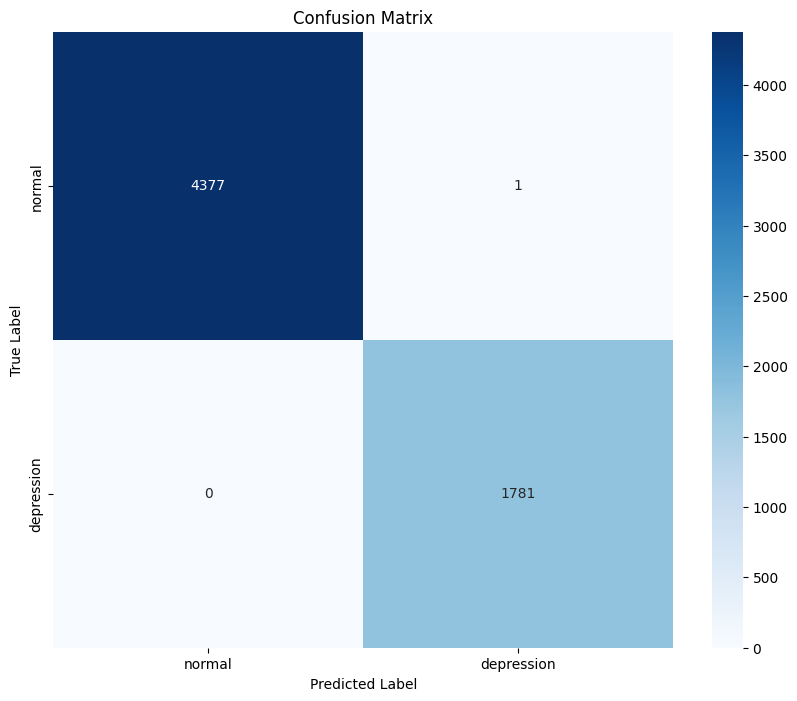


Classification Report:
              precision    recall  f1-score   support

      normal       0.59      0.78      0.67       967
  depression       0.48      0.27      0.35       712

    accuracy                           0.57      1679
   macro avg       0.54      0.53      0.51      1679
weighted avg       0.55      0.57      0.54      1679



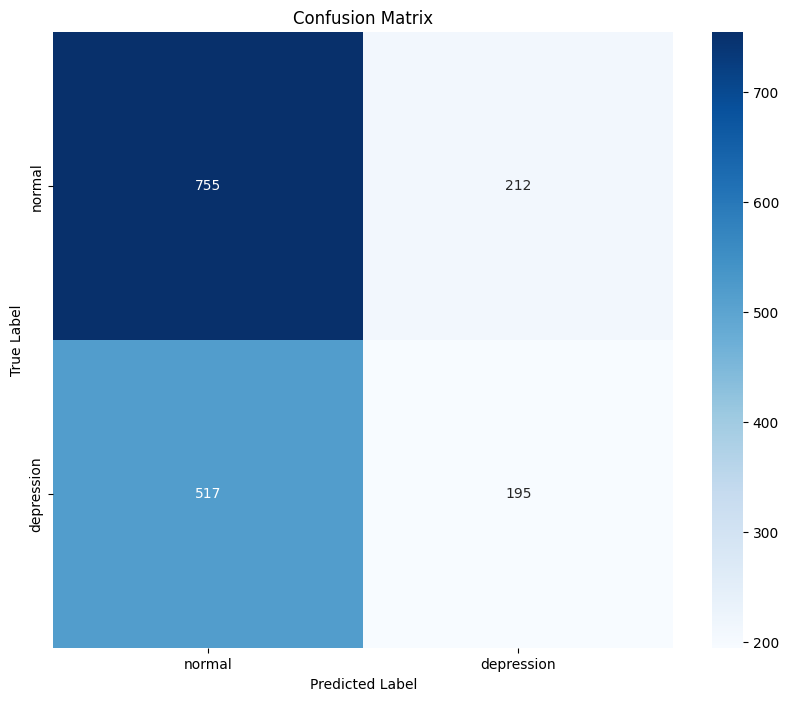

In [ ]:
imp.reload(functions)
from functions import *

# if classificaation is binarry
labels = ['normal', 'depression']

confusion_matrix_report(y_train, y_pred_train, labels)
confusion_matrix_report(y_test, y_pred_test, labels)

## XGBoost

In [42]:
imp.reload(functions)
from functions import *
# binary classification
labels = ['normal', 'depression']
XGBoostModel = train_xgboost_grid_search_simple(X_train, y_train, use_cuda=False)

     TRAIN STARTS
Training XGBoost model with grid search...
Fitting 5 folds for each of 192 candidates, totalling 960 fits


c:\Program Files\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:36:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Best parameters found:
colsample_bytree: 0.8
gamma: 0
learning_rate: 0.01
max_depth: 5
min_child_weight: 1
n_estimators: 100
subsample: 0.9
Training time: 218.56 seconds



Classification Report:
              precision    recall  f1-score   support

      normal       0.81      0.98      0.88      4378
  depression       0.90      0.42      0.57      1781

    accuracy                           0.82      6159
   macro avg       0.85      0.70      0.73      6159
weighted avg       0.83      0.82      0.80      6159



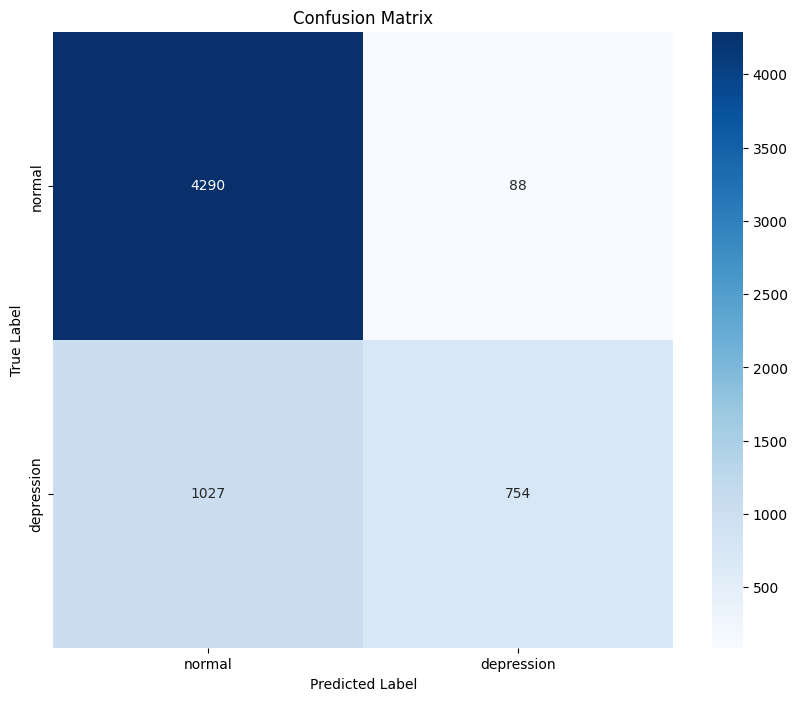


Classification Report:
              precision    recall  f1-score   support

      normal       0.58      0.95      0.72       967
  depression       0.44      0.05      0.09       712

    accuracy                           0.57      1679
   macro avg       0.51      0.50      0.40      1679
weighted avg       0.52      0.57      0.45      1679



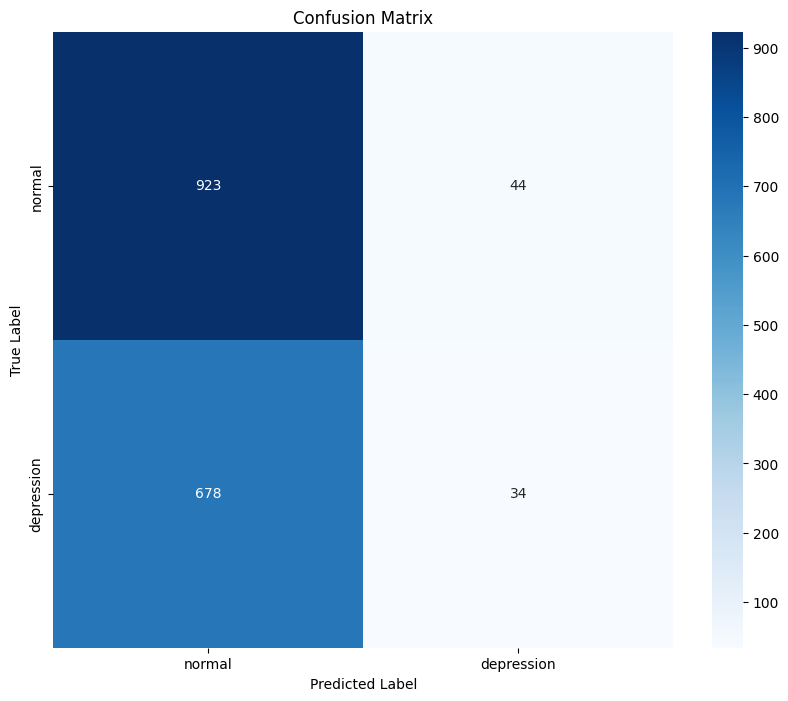

In [43]:
imp.reload(functions)
from functions import *
y_pred_train = XGBoostModel.predict(X_train)

labels = ['normal', 'depression']

confusion_matrix_report(y_train, y_pred_train, labels)
# feature_importance_xgboost(XGBoostModel)

y_pred_test = XGBoostModel.predict(X_test)
confusion_matrix_report(y_test, y_pred_test, labels)

-----------------

### Train with unbalanced datas

In [15]:
imp.reload(functions)
from functions import *


sentiments=['negative', 'neutral', 'positive']
sentiments = ['negative']
X_train, y_train = process_audio_files(BASE_PATH, df_train, sentiments=sentiments, method="simple")
X_test, y_test = process_audio_files(BASE_PATH, df_test, sentiments=sentiments, method="simple")


Processing Summary:
Successfully processed: 83 folders
Skipped: 0 files


C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(



Processing Summary:
Successfully processed: 78 folders
Skipped: 1 files

Skipped Files Details:
Folder v_79: Error processing positive_out.wav: can't extend empty axis 0 using modes other than 'constant' or 'empty'



Training with smote strategy...

Initial class distribution:
Class 0: 58 samples
Class 1: 25 samples

Using 3-fold cross-validation due to class sizes

Applying SMOTE oversampling...

Class distribution after balancing:
Class 0: 58 samples
Class 1: 58 samples
Fitting 3 folds for each of 192 candidates, totalling 576 fits

Best parameters found:
colsample_bytree: 0.8
gamma: 0
learning_rate: 0.1
max_depth: 5
min_child_weight: 3
n_estimators: 100
subsample: 0.9

Training with undersample strategy...

Initial class distribution:
Class 0: 58 samples
Class 1: 25 samples

Using 3-fold cross-validation due to class sizes

Applying undersampling to majority class...

Class distribution after balancing:
Class 0: 25 samples
Class 1: 25 samples
Fitting 3 folds for each of 192 candidates, totalling 576 fits

Best parameters found:
colsample_bytree: 0.8
gamma: 0.1
learning_rate: 0.01
max_depth: 3
min_child_weight: 1
n_estimators: 100
subsample: 0.8

Training with combine strategy...

Initial class 

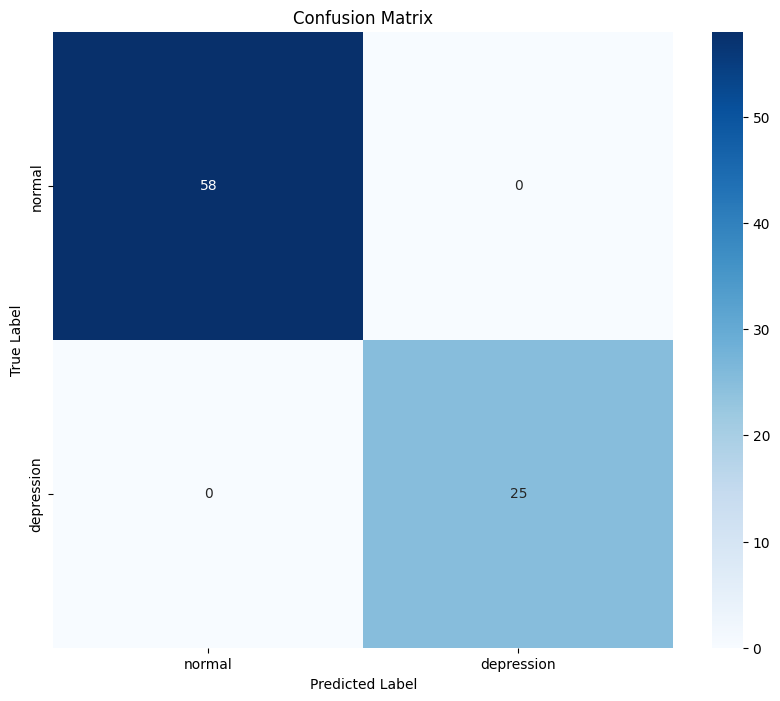


Classification Report:
              precision    recall  f1-score   support

      normal       0.74      0.93      0.82        58
  depression       0.20      0.05      0.08        20

    accuracy                           0.71        78
   macro avg       0.47      0.49      0.45        78
weighted avg       0.60      0.71      0.63        78



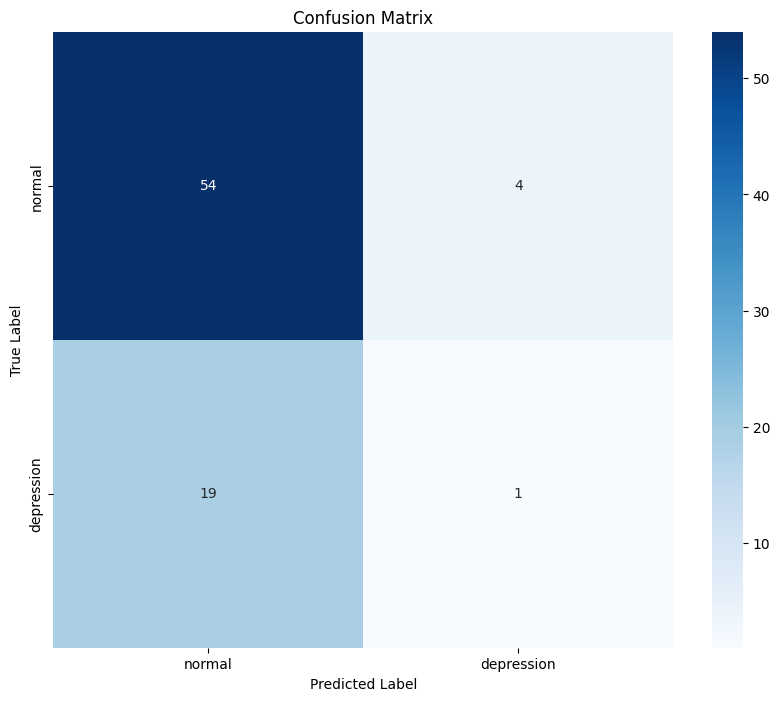


Results for undersample strategy:

Classification Report:
              precision    recall  f1-score   support

      normal       1.00      0.78      0.87        58
  depression       0.66      1.00      0.79        25

    accuracy                           0.84        83
   macro avg       0.83      0.89      0.83        83
weighted avg       0.90      0.84      0.85        83



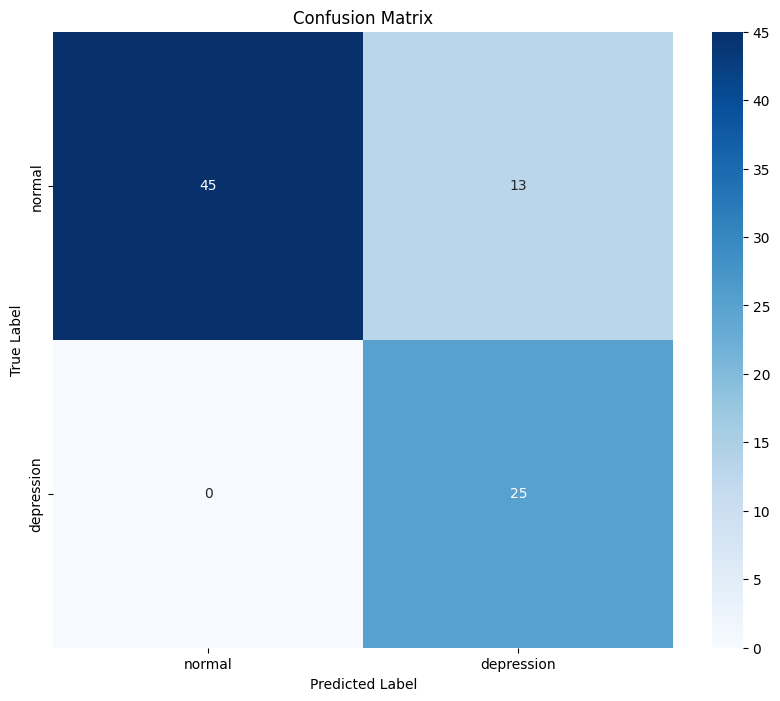


Classification Report:
              precision    recall  f1-score   support

      normal       0.73      0.79      0.76        58
  depression       0.20      0.15      0.17        20

    accuracy                           0.63        78
   macro avg       0.47      0.47      0.47        78
weighted avg       0.59      0.63      0.61        78



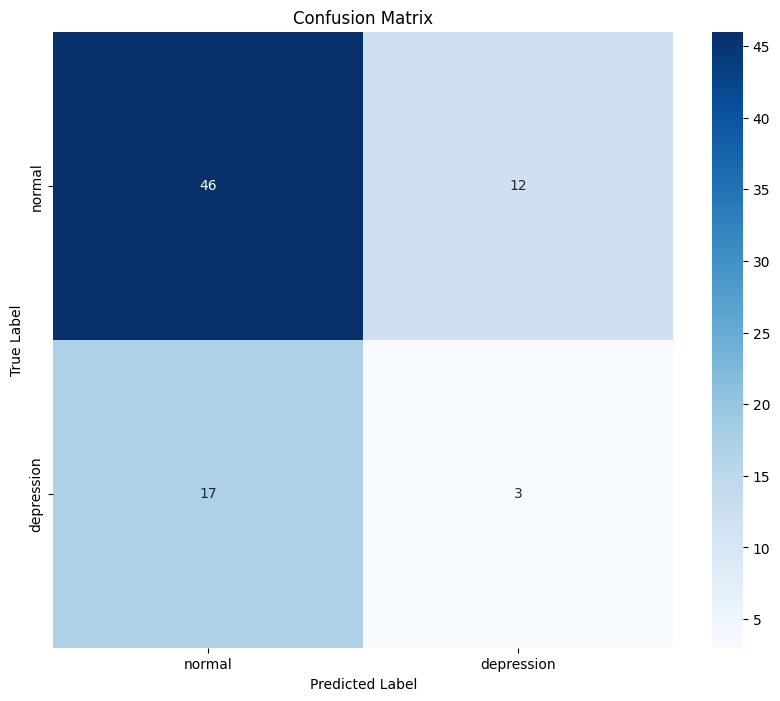


Results for combine strategy:

Classification Report:
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00        58
  depression       1.00      1.00      1.00        25

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



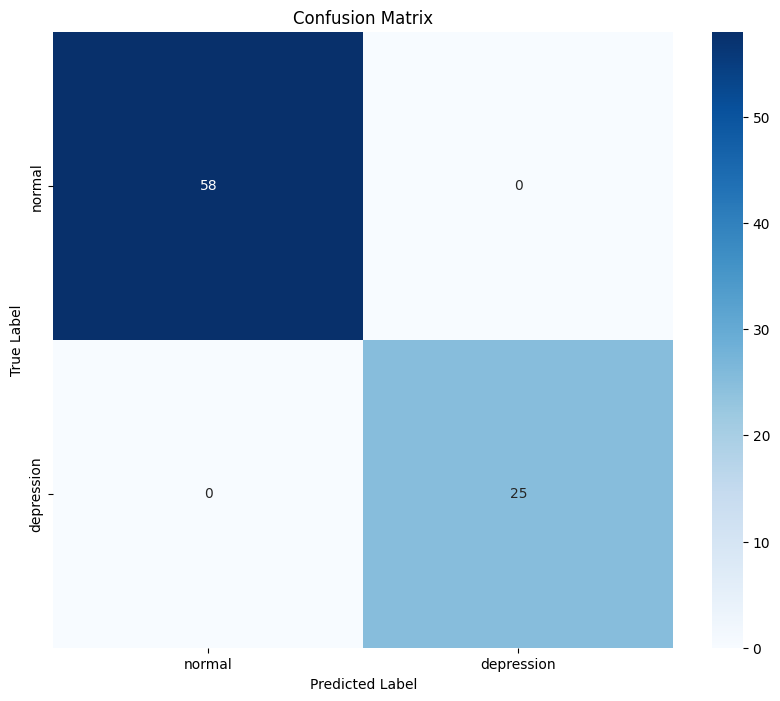


Classification Report:
              precision    recall  f1-score   support

      normal       0.74      0.95      0.83        58
  depression       0.25      0.05      0.08        20

    accuracy                           0.72        78
   macro avg       0.50      0.50      0.46        78
weighted avg       0.62      0.72      0.64        78



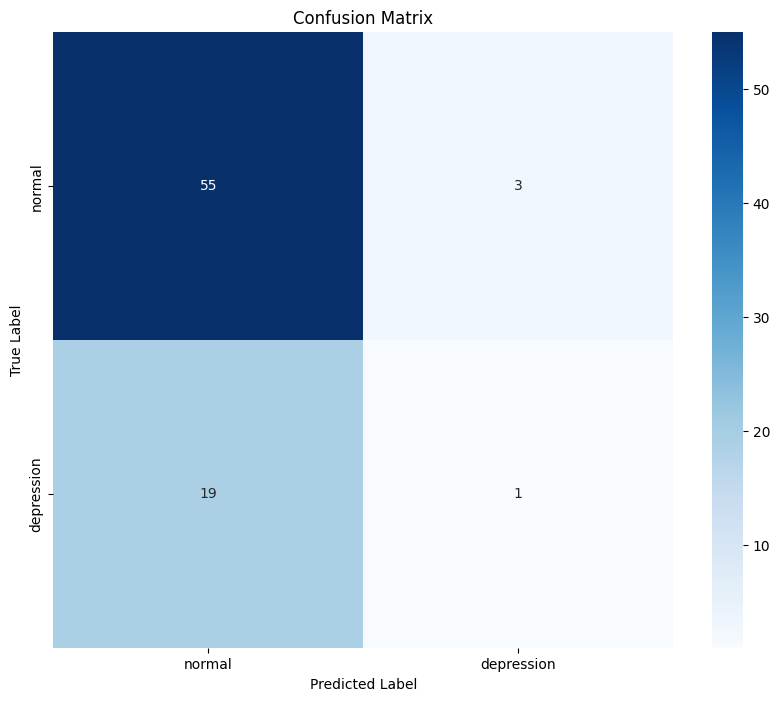


Results for weighted strategy:

Classification Report:
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00        58
  depression       1.00      1.00      1.00        25

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



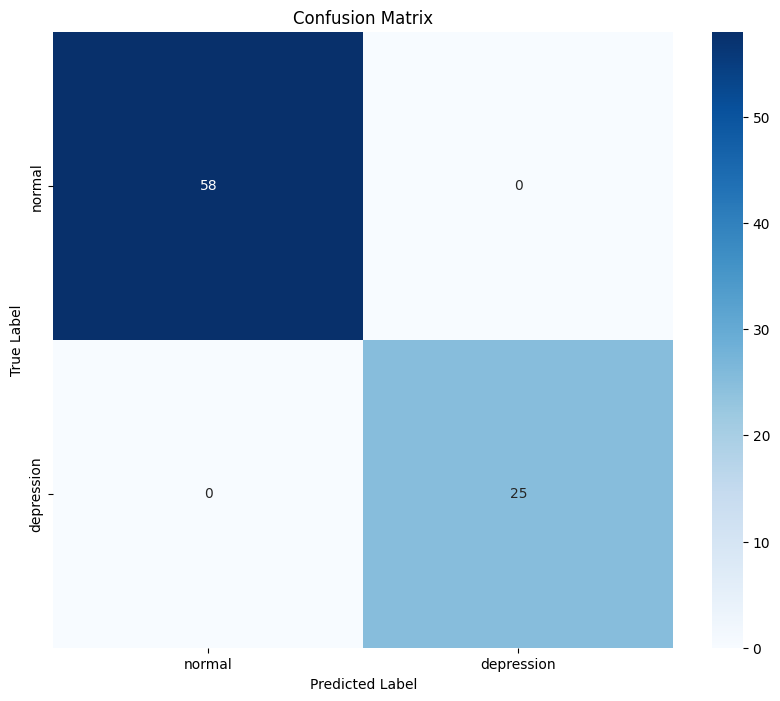


Classification Report:
              precision    recall  f1-score   support

      normal       0.75      0.93      0.83        58
  depression       0.33      0.10      0.15        20

    accuracy                           0.72        78
   macro avg       0.54      0.52      0.49        78
weighted avg       0.64      0.72      0.66        78



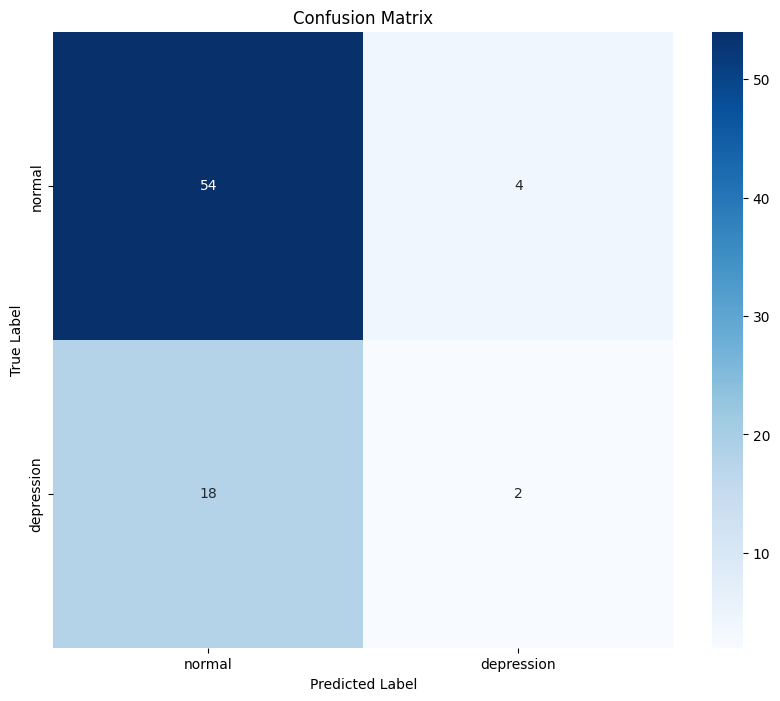

In [16]:
imp.reload(functions)
from functions import *

strategies = ['smote', 'undersample', 'combine', 'weighted']
models = {}

for strategy in strategies:
    print(f"\nTraining with {strategy} strategy...")
    models[strategy] = train_balanced_xgboost_grid_search(X_train, y_train, balance_strategy=strategy)

for strategy in strategies:
    print(f"\nResults for {strategy} strategy:")
    y_pred_train = models[strategy].predict(X_train)
    confusion_matrix_report(y_train, y_pred_train, labels)
    y_pred_test = models[strategy].predict(X_test)
    confusion_matrix_report(y_test, y_pred_test, labels)